# UDACITY DAND PISA Project
## by (Samir Attyani)

## Investigation Overview

Perform data exploratory and explanatory on PISA dataset utiling data wrangling and visualization based on uni, bi, and multivariant visualizations.

This is a huge dataset, we need to filter out columns based on question we need to answer. since the focus of PISA is math, science and reading. we need to get columns with such important details or have impact. such as:

1. math/reading/science score
2. presence of internet
3. mother, father education
4. student gender
5. mother still available and at home
6. father still available and at home
7. mother & Mother highest school grade
8. Math, Science, and reading scores (5 items each)

students coming from 68 countries (67 to be exact, USA represented by two records Connecticut & Massachusetts. Liechtenstein with total count of 293, while mixco comes first with total rows of 33806. Wonder why Mixco gets the lion share?

## Dataset Overview

**PISA program overview**

The Programme for International Student Assessment (PISA) is an international assessment of the skills and knowledge of 15-year-old students; in addition, it provides information about a range of factors that contribute to the success of students, schools, and education systems. PISA is a collaborative effort among member countries of the Organisation for Economic Co-operation and Development (OECD).

source: https://www.cmec.ca/251/Programme_for_International_Student_Assessment_(PISA).html
        
## The Investegation efforts will try to answer the following questions:
##### 1. How will student from various countries perform in math, reading, and science cosidering mother, father education, work, availability of internet, and textbox?
##### 2. Are there countries that perform better than others?
#### 3. Compare results based on gender?


In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
# failed to read file as utf-8. changed to ISO-8859-1 instead.
df_pisa_clean=pd.read_csv('df_pisa_clean.csv')

## (Visualization 1)
> Histogram for the three materials used to measure students scores. 
1. math
2. reading
3. science

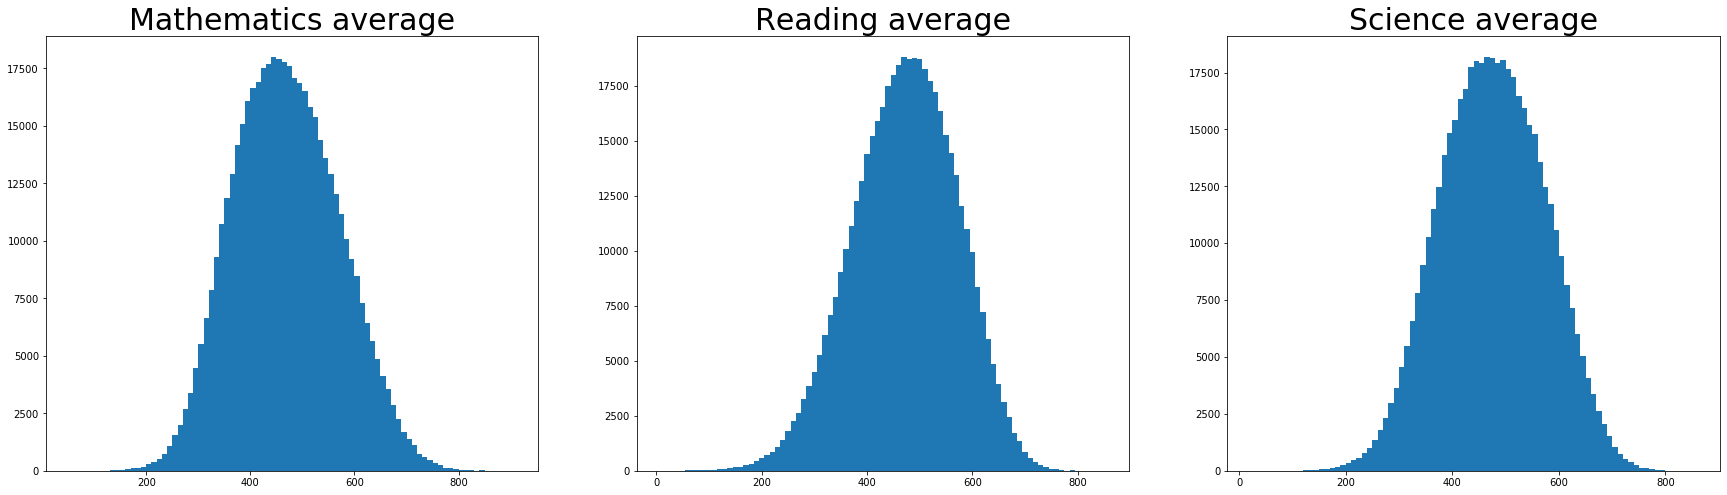

In [9]:
math_bins=np.arange(50,df_pisa_clean['math'].max()+10,10)
reading_bins=np.arange(5,df_pisa_clean['reading'].max()+10,10)
science_bins=np.arange(20,df_pisa_clean['science'].max()+10,10)

plt.figure(figsize=(30,8))
plt.subplot(1, 3, 1)
plt.hist(df_pisa_clean['math'],bins=math_bins);
plt.title('Mathematics average',fontsize=30)


plt.subplot(1, 3, 2)
plt.hist(df_pisa_clean['reading'],bins=reading_bins);
plt.title('Reading average',fontsize=30)


plt.subplot(1, 3, 3)
plt.hist(df_pisa_clean['science'],bins=science_bins);
plt.title('Science average',fontsize=30);


## (Visualization 2)
> identify countries with highest performance based on student score in each of the materials Math, reading, and science

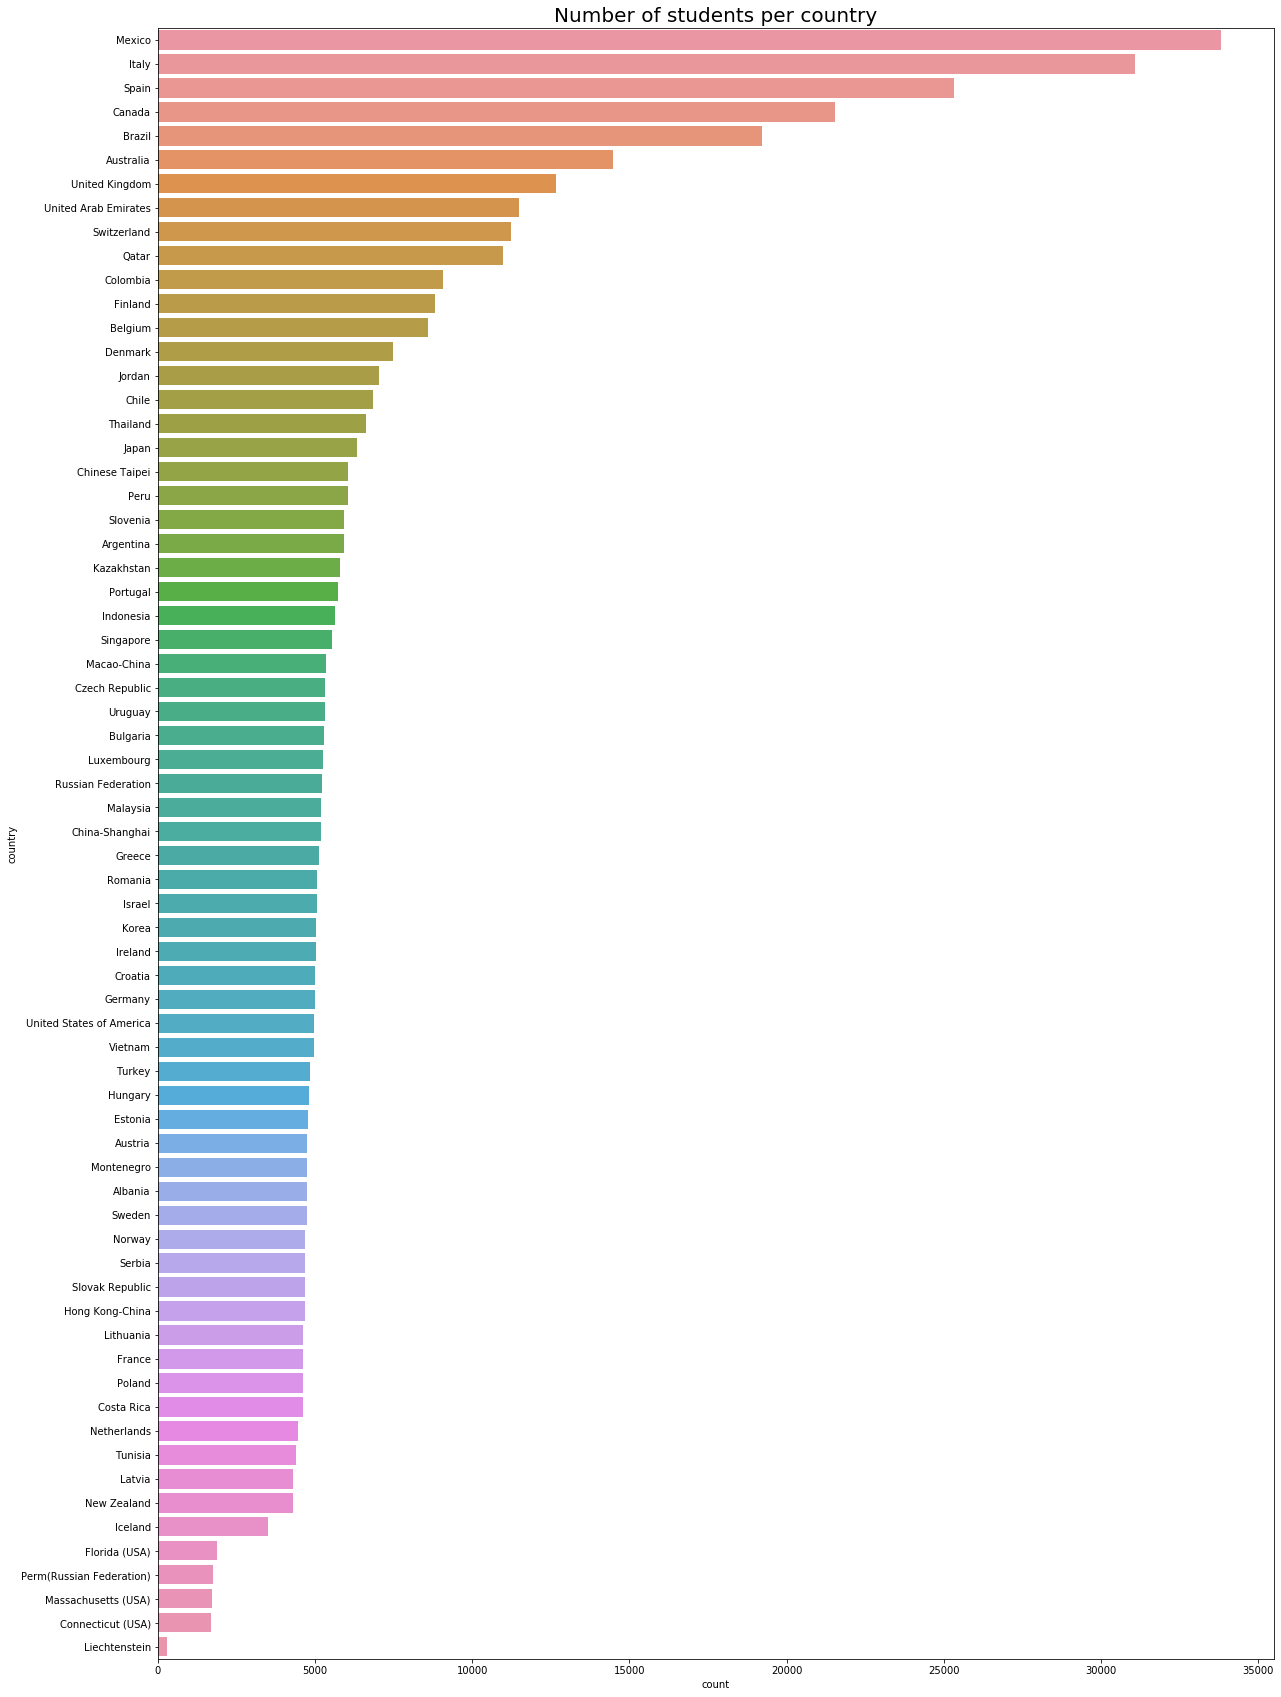

In [10]:
order= df_pisa_clean['country'].value_counts().index
plt.figure(figsize=[20,30])
sb.countplot(data=df_pisa_clean,y='country',order=order)
plt.title('Number of students per country',size=20);

## (Visualization 3)


1. Based on each subject, females have better scores in reading, while males are better in science and Math.
2. Comparing results based on Total average, Females are doing better.This has to do with the almost 35% diffence in reading.

In [6]:
df_pisa_gender = df_pisa_clean.groupby('gender')[['math','reading','science','total']].mean().reset_index()
df_pisa_gender_melt = pd.melt(df_pisa_gender, id_vars=['gender'])

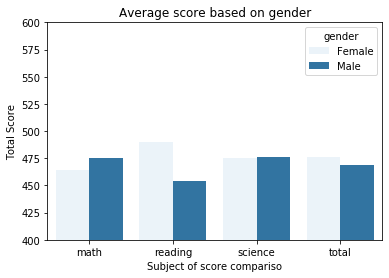

In [12]:
sb.barplot(data=df_pisa_gender_melt, x="variable",y="value",hue="gender", color=sb.color_palette()[0])
plt.title('Average score based on gender')
plt.xlabel('Subject of score compariso')
plt.ylabel('Total Score')
plt.ylim(400, 600);

## (Visualization 4)
> scoring results with consideration for internet presence. This was a major suprise. Internet birng huge advantage to students score.

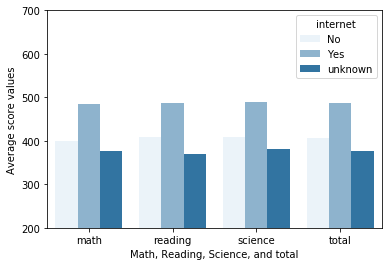

In [13]:
df_pisa_internet = df_pisa_clean.groupby('internet')[['math','reading','science','total']].mean().reset_index()
df_pisa_internet_melt = pd.melt(df_pisa_internet, id_vars=['internet'])
sb.barplot(data=df_pisa_internet_melt, x="variable",y="value",hue="internet",color=sb.color_palette()[0]);
plt.ylim(200,700)
plt.xlabel('Subjects & Total');
plt.ylabel('Average score values');

## (Visualization 5)
The final visual to provide correlation among various scores for students. We noticed high correlation between all, specially in math and science


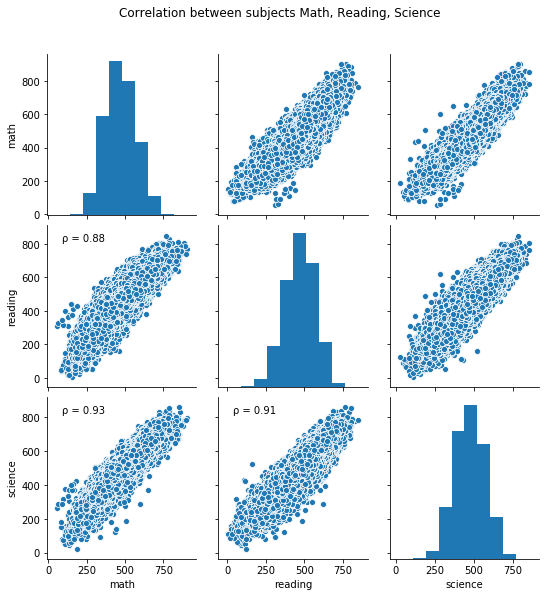

In [14]:

df_pisa_clean_melt = df_pisa_clean.melt(id_vars=['country','student_id','gender','mother_at_home','father_at_home','mother_grade','father_grade',
                           'father_job','mother_job','internet','textbook','age'],
                            var_name='material',value_name='score')

from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sb.pairplot(data = df_pisa_clean, vars=["math", "reading", "science"]);
g.map_lower(corrfunc)
g.fig.suptitle("Correlation between subjects Math, Reading, Science",y=1.08);



### Conclusion

##### 1. How will student from various countries perform in math, reading, and science cosidering mother, father education, work, availability of internet, and textbox?
Score for math, reading, science is measured based on mean values for the five readings available in the dataset. The visualizaiton provided unimodal for all of the three scores that are normally distributed. Majority of students get scores between 300 and 600. the boxplot diagram indicated many outliars which indicated high variations of scores from country to the other.


##### 2. Are there countries that perform better than others?

Grouping data results based on countries,
1. Around 7 out of 10 top performer countries are in Far east, remaining 3 in Europe
2. low performing countries range from South America and middle east
3. China-Shanghai came fist based on total score, while Peru came last


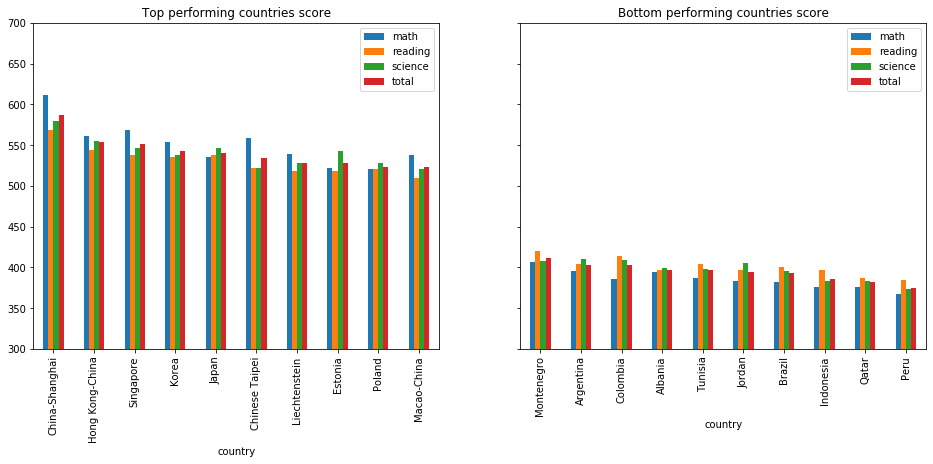

In [17]:
df_pisa_countries = df_pisa_clean.groupby('country')[['math','reading','science','total']].mean()
f,axes = plt.subplots(1,2, figsize=(16,6), sharey=True)
df_pisa_countries.sort_values(by='total', ascending=False).head(10).plot(kind='bar',ax=axes[0])
df_pisa_countries.sort_values(by='total', ascending=False).tail(10).plot(kind='bar',ax=axes[1]);
axes[0].set_title('Top performing countries score');
axes[1].set_title('Bottom performing countries score');
plt.ylim(300,700);

#### 3. Compare results based on gender?

Females has much better scores than males in reading score over 35 points higher than males. In Math Males did better scoring but only about 11 points diffrence. Finally, science came about the same scores.

#### Additional finding:
One of the major findings in addition to asnwering initial questin the impact of internet on students score. in each category we saw big impact of having internet on students score.